In [4]:
import numpy as np

In [53]:
cric_data=np.loadtxt("cric.tsv",skiprows=1) # we are skiping the first row
cric_data  # fetch the data in array form

array([[  0., 100.,  78., 342.],
       [  1.,  11.,  62., 191.],
       [  2.,   8.,  85., 252.],
       [  3.,  71.,  24., 307.],
       [  4., 104.,  17., 229.],
       [  5.,  18., 104., 246.],
       [  6.,   8.,  76., 226.],
       [  7.,  86.,  74., 288.],
       [  8.,  12.,  60., 216.],
       [  9.,  25.,  90., 304.],
       [ 10.,  56.,   6., 272.],
       [ 11.,  88.,  69., 302.],
       [ 12., 147.,  65., 312.],
       [ 13., 121., 146., 370.],
       [ 15.,  99., 110., 362.]])

In [6]:
cric_data.shape  # to check the rows and columns

(15, 4)

In [7]:
sachin= cric_data[: , 1] # all the rows of 1 column
sachin

array([100.,  11.,   8.,  71., 104.,  18.,   8.,  86.,  12.,  25.,  56.,
        88., 147., 121.,  99.])

In [8]:
dravid=cric_data[: , 2]
dravid

array([ 78.,  62.,  85.,  24.,  17., 104.,  76.,  74.,  60.,  90.,   6.,
        69.,  65., 146., 110.])

In [9]:
def stats(col):
    print("Mean:",np.mean(col))
    print("median:",np.median(col))

In [10]:
print(stats(sachin))
print(stats(dravid))

Mean: 63.6
median: 71.0
None
Mean: 71.06666666666666
median: 74.0
None


In [11]:
np.count_nonzero(sachin>99) #no of times sachin from the century


4

In [12]:
np.count_nonzero(dravid>99)

3

In [13]:
# how many matches needed by sachin and davind to reach 500 runs?

In [14]:
sachin_cumscores=np.cumsum(sachin)
sachin_cumscores

array([100., 111., 119., 190., 294., 312., 320., 406., 418., 443., 499.,
       587., 734., 855., 954.])

In [15]:
np.searchsorted(sachin_cumscores,500)

11

In [16]:
dravid_cumscores=np.cumsum(dravid)
dravid_cumscores

array([  78.,  140.,  225.,  249.,  266.,  370.,  446.,  520.,  580.,
        670.,  676.,  745.,  810.,  956., 1066.])

In [17]:
np.searchsorted(dravid_cumscores,500)

7

In [18]:
# how many times sachine and davind form the cantury
centuries_s_d =sachin + dravid
centuries_s_d

array([178.,  73.,  93.,  95., 121., 122.,  84., 160.,  72., 115.,  62.,
       157., 212., 267., 209.])

In [19]:
np.count_nonzero(centuries_s_d>99)

9

In [20]:
# pandas analysis


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [84]:
loan =pd.read_csv("loan_data_set.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
loan.shape

(614, 13)

In [26]:
loan.info()  # to find the stucture of the tables
#everything like a string is known as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
loan .describe()  # use to do the besic function function

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
loan.columns  

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
loan['Property_Area'].describe() # to checking the perticular column

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [54]:
loan.head(7) #rows from top


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [31]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
loan.tail(3) #rows from the last

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [33]:
loan.isnull()  # this will show true in table where is null value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
loan.isnull().sum() # we count the true in the table

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

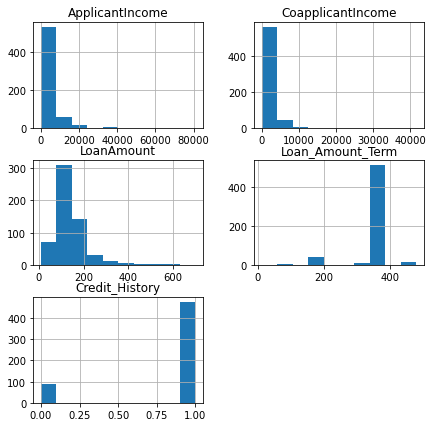

In [35]:
loan.hist(figsize=(7,7))

plt.show()

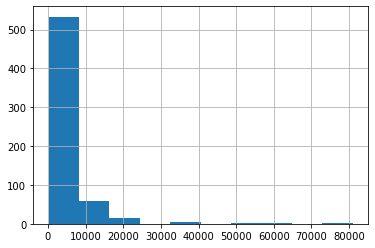

In [37]:
loan['ApplicantIncome'].hist()
plt.show()

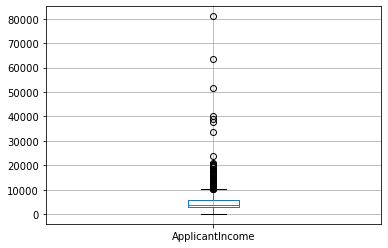

In [38]:
#boxplot (explore about it)
loan.boxplot(column='ApplicantIncome')
plt.show()

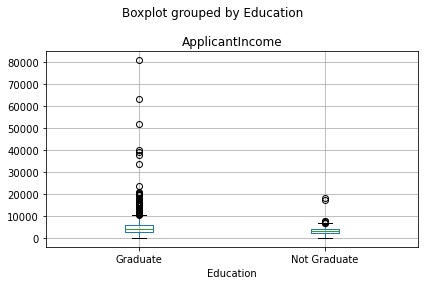

In [39]:
loan.boxplot(column="ApplicantIncome", by= "Education")
plt.tight_layout()
plt.show()

In [40]:
loan["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [41]:
print(loan["Gender"].value_counts())
print(loan["Married"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


In [46]:
loan_Gender=loan["Gender"].value_counts(normalize=True)
loan_Gender

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

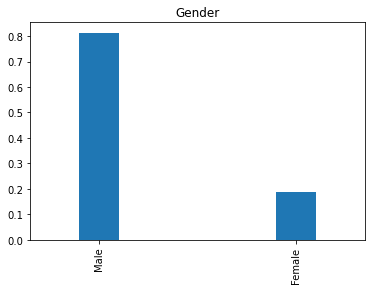

In [47]:
loan_Gender.plot(kind = 'bar', title = "Gender",width=0.2)


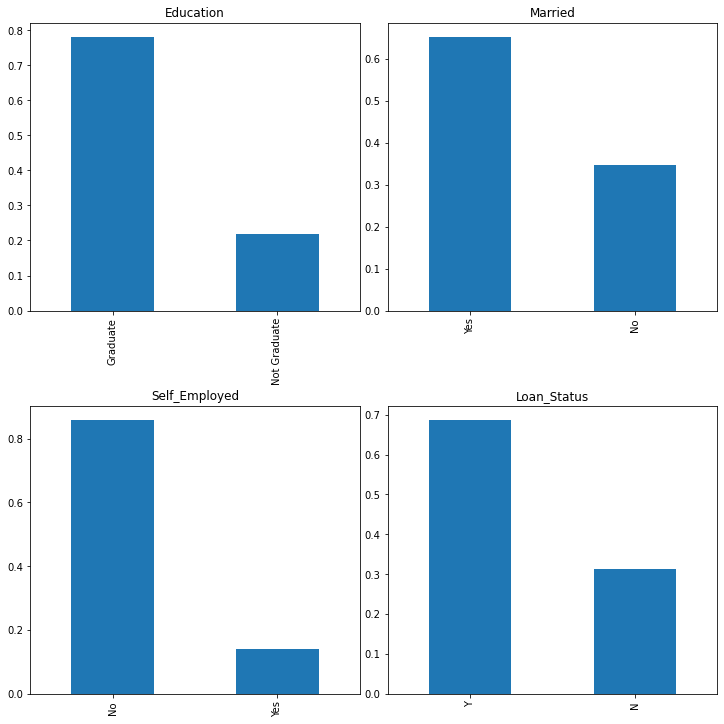

In [58]:
plt.subplot(221)
loan["Education"].value_counts(normalize=True).plot(kind="bar",title="Education",figsize=(10,10))
plt.tight_layout(pad=0.5)
plt.subplot(222)
loan["Married"].value_counts(normalize=True).plot(kind="bar",title="Married")
plt.tight_layout(pad=0.5)
plt.subplot(223)
loan["Self_Employed"].value_counts(normalize=True).plot(kind="bar",title="Self_Employed")
plt.subplot(224)
loan["Loan_Status"].value_counts(normalize=True).plot(kind="bar",title="Loan_Status")
plt.tight_layout(pad=0.5)

In [60]:
loan["Gender"].fillna(loan["Gender"].mode()[0],inplace=True)
loan['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [57]:
loan["Married"].fillna(loan["Married"].mode()[0],inplace=True)

In [61]:
loan["Married"]

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [66]:
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0],inplace=True)
loan["Loan_Status"].fillna(loan["Loan_Status"].mode()[0],inplace=True)


In [63]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents          15
Education            0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income_log     0
dtype: int64

In [77]:
# Fill Numerical values
loan["LoanAmount"].fillna(loan["LoanAmount"].mean(),inplace=True)
loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mean(),inplace=True)

In [78]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents          15
Education            0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income_log     0
dtype: int64

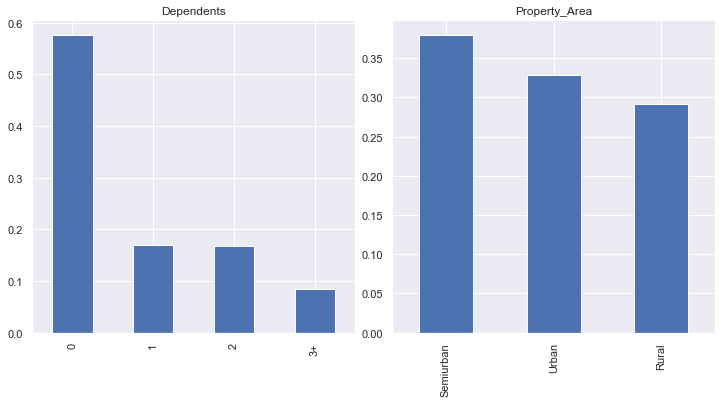

In [79]:
# Ordinal values
plt.subplot(221)
loan["Dependents"].value_counts(normalize=True).plot(kind="bar",title="Dependents",figsize=(10,10))
plt.tight_layout(pad=0.5)

plt.subplot(222)
loan["Property_Area"].value_counts(normalize=True).plot(kind="bar",title="Property_Area")
plt.tight_layout(pad=0.5)


In [80]:
loan["Dependents"].fillna(loan["Dependents"].mode(),inplace=True)

KeyError: 'ApplicantIncome'

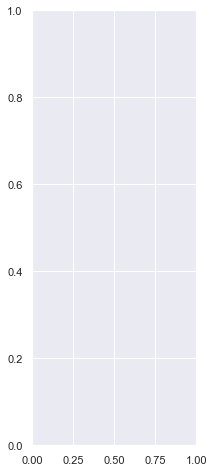

In [81]:
# Numerical value




plt.subplot(131)
loan['ApplicantIncome'].plot.box(figsize=(8,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
loan['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
loan['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

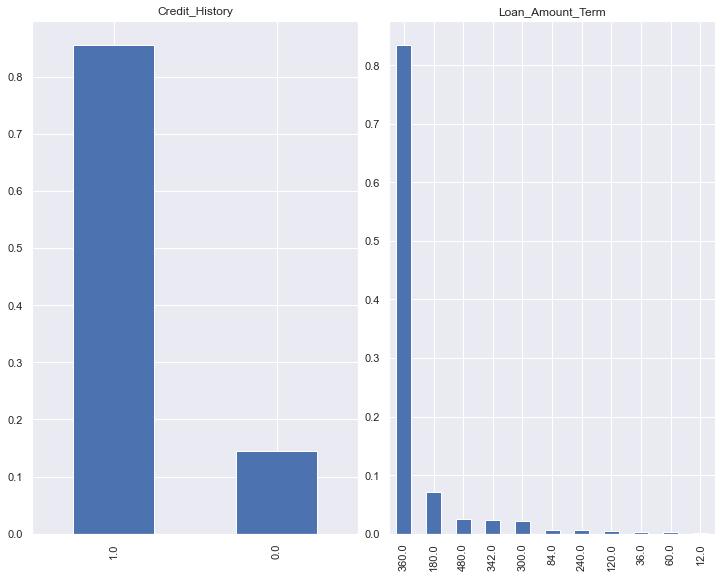

In [82]:
plt.subplot(121)
loan.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)


plt.subplot(122)
loan.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

In [83]:
loan["Credit_History"].fillna(value = 1,inplace=True)
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents          15
Education            0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income_log     0
dtype: int64

In [85]:
loan['Total_income'] = loan["ApplicantIncome"]+loan["CoapplicantIncome"]

loan['Total_income_log'] = np.log(loan["Total_income"])

loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'Total_income_log'],
      dtype='object')

In [86]:
loan.drop(['ApplicantIncome','CoapplicantIncome','Total_income'],axis=1,inplace=True)


loan['Gender'].value_counts()


loan['Gender'][loan['Loan_Status']=='Y'].value_counts()


Male      339
Female     75
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

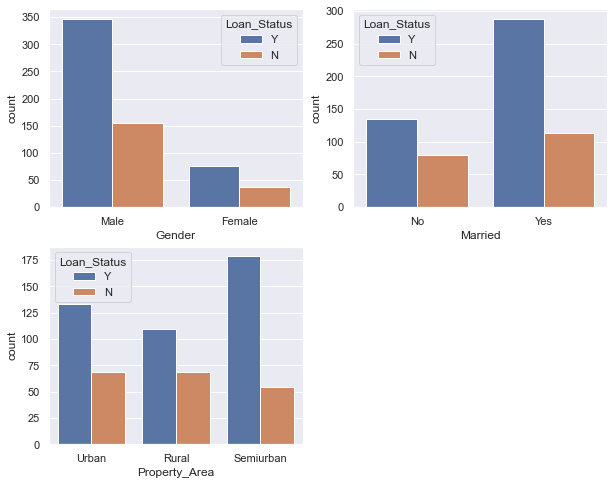

In [75]:
sns.set(rc={'figure.figsize':(10,8)})

plt.subplot(221)
sns.countplot(data=loan,x="Gender", hue='Loan_Status')

plt.subplot(222)
sns.countplot(data=loan,x="Married", hue='Loan_Status')


plt.subplot(223)
sns.countplot(x="Property_Area", hue='Loan_Status', data=loan)


In [76]:
loan['Property_Area'][loan['Loan_Status']=='Y'].value_counts()

loan['Property_Area'][loan['Loan_Status']=='N'].value_counts()

loan.groupby('Gender')['Property_Area'].value_counts()

loan.groupby('Gender')['Total_income_log'].mean()

Gender
Female    8.476517
Male      8.712450
Name: Total_income_log, dtype: float64

In [87]:
correlation_mat = loan.corr()
correlation_mat


,LoanAmount,Loan_Amount_Term,Credit_History,Total_income_log
LoanAmount,1.000000,0.039447,-0.008433,0.700809
Loan_Amount_Term,0.039447,1.000000,0.001470,-0.055653
Credit_History,-0.008433,0.001470,1.000000,0.020070
Total_income_log,0.700809,-0.055653,0.020070,1.000000
